In [1]:
from scipy.optimize import brent
import numpy as np
import matplotlib.pyplot as plt

def fa(x):
    return -1*(x**2)*np.exp(-1*np.abs(x-3))

def fb(x):
    return x**2 + np.exp(-1*np.abs(x-4))

def fc(x):
    return (x-3)**2 + np.log(1+np.abs(x))

print("Define Functions of a, b, c")

Define Functions of a, b, c


In [3]:
'''
Apply BRENT's Method prvided by Python
'''

"Generate the output of each function a, b and c."
t=np.linspace(-1,4,150)

ya = fa(t)
yb = fb(t)
yc = fc(t)

"Using BRENT's method to find the minimal point."
xa_min=brent(fa, brack=(-1,4))
xb_min=brent(fb, brack=(-1,4))
xc_min=brent(fc, brack=(-1,4))

print("Computing complete!!")

Computing complete!!


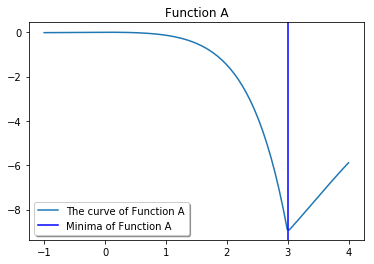

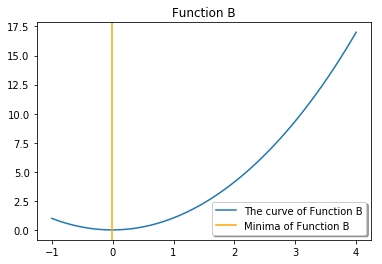

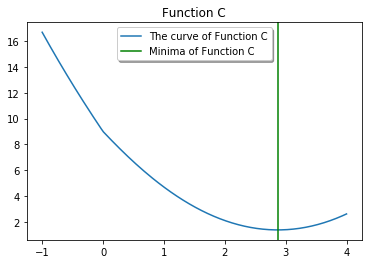

-------Apply BRENT's Method prvided by Python-----------
minima_a =  -9.000 at  3.000
minima_b =  0.01823 at  -0.00908
minima_c =  1.370 at  2.871


In [4]:
"Plot results via images and message."

plt.plot(t,ya)
plt.axvline(xa_min,color = 'blue')
plt.title('Function A')
plt.legend(['The curve of Function A','Minima of Function A'],
           loc='best', shadow=True)
plt.show()

plt.plot(t,yb)
plt.axvline(xb_min,color = 'orange')
plt.title('Function B')
plt.legend(['The curve of Function B','Minima of Function B'],
           loc='best', shadow=True)
plt.show()

plt.plot(t,yc)
plt.axvline(xc_min,color = 'green')
plt.title('Function C')
plt.legend(['The curve of Function C','Minima of Function C'],
           loc='best', shadow=True)
plt.show()
print("-------Apply BRENT's Method prvided by Python-----------")
print('minima_a = ', "{:.3f}".format(fa(xa_min)), 'at ', "{:.3f}".format(xa_min))
print('minima_b = ', "{:.5f}".format(fb(xb_min)), 'at ', "{:.5f}".format(xb_min))
print('minima_c = ', "{:.3f}".format(fc(xc_min)), 'at ', "{:.3f}".format(xc_min))

In [5]:
'''
Write a function to search for an initial bracket given a function and a starting point:
'''
def bracket_search(fn, x0, initial_step):
    
    """
    Return a bracket containing a minima
    Find initial bracket by starting at x0 and a
    step size of initial_step
    Function is called as follows:
    b=bracket_search(fn, 1.0, 0.1)
    where fn is the function to be minimised
    returns: Bracket as (b[0],b[1],b[2])
    """
    while fn(x0 - initial_step) < fn(x0) or fn(x0 + initial_step) < fn(x0):
        yb = fn(x0)
        ya = fn(x0 - initial_step)
        yc = fn(x0 + initial_step)
        
        if ya > yb and yc >yb:
            break
        
        else:
            if ya < yc:
                x0 = x0 - initial_step
            if yc < ya:
                x0 = x0 + initial_step
    Bracket = np.array([x0 - initial_step, x0, x0 + initial_step])
    return Bracket


print("Define Functions of Sarching Bracket!")

Define Functions of Sarching Bracket!


In [6]:
"""
Apply the function of bracket search to each of the functions in part (1), starting with x0=0 and initial step=1.
"""

ba = bracket_search(fa, 0, 1)
bb = bracket_search(fb, 0, 1)
bc = bracket_search(fc, 0, 1)

"Printing the results of bracket_search being written by me"

print("-----Printing the results of bracket_search being written by me-----")
print("bracketA = ", 
      "{:.3f}".format(ba[0])," ,",
      "{:.3f}".format(ba[1])," ,",
      "{:.3f}".format(ba[2]))
print("bracketB = ", 
      "{:.3f}".format(bb[0])," ,",
      "{:.3f}".format(bb[1])," ,",
      "{:.3f}".format(bb[2]))
print("bracketC = ", 
      "{:.3f}".format(bc[0])," ,",
      "{:.3f}".format(bc[1])," ,",
      "{:.3f}".format(bc[2]))

-----Printing the results of bracket_search being written by me-----
bracketA =  2.000  , 3.000  , 4.000
bracketB =  -1.000  , 0.000  , 1.000
bracketC =  2.000  , 3.000  , 4.000


In [7]:
"""
Write a function to perform golden section search
"""
def golden_section(fn, x0, initial_step,  min_width):
    
    """
    Return final bracket using golden section search
    Find initial bracket by starting at x0 and a
    step size of initial_step
    Terminate golden section when |c-a|<min_width
    returns: Bracket as (result[0],result[1],result[2])
    Function is called as follows:
    result=golden_section(fn, 1.0, 0.1, 0.0001)
    where fn is the function to be minimised.
    """
    bracket = bracket_search(fn, x0, initial_step)
    k =  0.381966
    while np.abs(bracket[2]-bracket[0])>min_width:
        
        k0 = (bracket[1] - bracket[0]) * k + bracket[0]
        k1 = (bracket[2] - bracket[1]) * k + bracket[1]
        
        y0 = fn(k0)
        y1 = fn(k1)
        
        if y0 < fn(bracket[1]):
            bracket = np.array([bracket[0],
                                        k0,
                                        bracket[1]])
        else:
            bracket = np.array([k0,
                                        bracket[1],
                                        bracket[2]])
        
        if y1 < fn(bracket[1]):
            bracket = np.array([bracket[1],
                                        k1,
                                        bracket[2]])
        else:
            bracket = np.array([bracket[0],
                                        bracket[1],
                                        k1])
        
        if np.abs(bracket[2]-bracket[0])<=min_width:
            break
    
    
    return bracket

print("Define Functions of golden section search!")

Define Functions of golden section search!


In [8]:
"""
Use my function to minimise the following functions

"""
g_ba = golden_section(fa, 1, 1, 0.01)
g_bb = golden_section(fb, 1, 1, 0.01)
g_bc = golden_section(fc, 1, 1, 0.01)

print("-------Use my function to minimise the following functions-----------")
print("Golden_bracketA = ", 
      "{:.3f}".format(g_ba[0])," ,",
      "{:.5f}".format(g_ba[1])," ,",
      "{:.5f}".format(g_ba[2]))
print("Golden_bracketB = ", 
      "{:.3f}".format(g_bb[0])," ,",
      "{:.3f}".format(g_bb[1])," ,",
      "{:.3f}".format(g_bb[2]))
print("Golden_bracketC = ", 
      "{:.3f}".format(g_bc[0])," ,",
      "{:.3f}".format(g_bc[1])," ,",
      "{:.3f}".format(g_bc[2]))


"Calculating the minima in three functions"
ca = (g_ba[0] + g_ba[2])/2
cb = (g_bb[0] + g_bb[2])/2
cc = (g_bc[0] + g_bc[2])/2

print("--------Showing the minima using my written method in three functions-------")
print('Golden_minima_a = ', "{:.3f}".format(fa(ca)), 'at ', "{:.3f}".format(ca))
print('Golden_minima_b = ', "{:.5f}".format(fb(cb)), 'at ', "{:.5f}".format(cb))
print('Golden_minima_c = ', "{:.3f}".format(fc(cc)), 'at ', "{:.3f}".format(cc))


-------Use my function to minimise the following functions-----------
Golden_bracketA =  2.992  , 3.00000  , 3.00007
Golden_bracketB =  -0.011  , -0.008  , -0.005
Golden_bracketC =  2.869  , 2.872  , 2.876
--------Showing the minima using my written method in three functions-------
Golden_minima_a =  -8.940 at  2.996
Golden_minima_b =  0.01823 at  -0.00806
Golden_minima_c =  1.370 at  2.873


Show Results by images


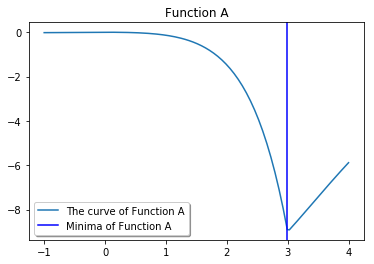

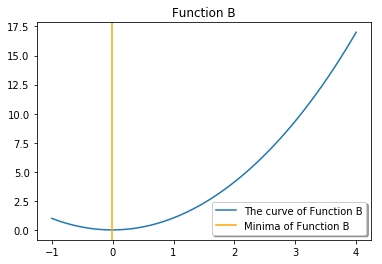

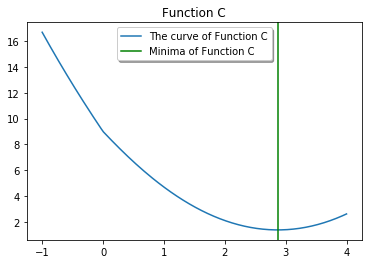

In [9]:
'''
Show Results by images
'''
print("Show Results by images")

plt.plot(t,ya)
plt.axvline(ca,color = 'blue')
plt.title('Function A')
plt.legend(['The curve of Function A','Minima of Function A'],
           loc='best', shadow=True)
plt.show()

plt.plot(t,yb)
plt.axvline(cb,color = 'orange')
plt.title('Function B')
plt.legend(['The curve of Function B','Minima of Function B'],
           loc='best', shadow=True)
plt.show()

plt.plot(t,yc)
plt.axvline(cc,color = 'green')
plt.title('Function C')
plt.legend(['The curve of Function C','Minima of Function C'],
           loc='best', shadow=True)
plt.show()
